In [2]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import time
import matplotlib.dates as mdates
import os

In [28]:
# Definición de la ruta y el nombre del archivo.
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/LEGUIZAMON RAMIREZ LAURA SOFIA/Muestra2/"  # Directorio principal donde se almacenan los datos.
filename = "LSLR PARTE 2 DE 3 CRISIS.m00"  # Nombre específico del archivo a cargar.

exportpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/"

Tiempo de muestreo identificado: 2ms
Cargando Datos...
---Datos cargados en 11.479591846466064 seconds ---
[('10:21:30.000000', '10:21:51.000000'), ('10:32:28.000000', '10:33:09.000000'), ('10:35:53.000000', '10:36:10.000000'), ('10:34:21.000000', '10:37:34.000000'), ('10:44:34.000000', '10:44:47.000000'), ('10:48:06.000000', '10:48:17.000000'), ('10:51:14.000000', '10:51:30.000000'), ('10:52:19.000000', '10:52:27.000000'), ('10:57:40.000000', '10:57:45.000000'), ('10:58:50.000000', '10:59:01.000000'), ('11:03:40.000000', '11:03:47.000000'), ('11:09:10.000000', '11:09:17.000000'), ('11:15:26.000000', '11:15:38.000000'), ('11:22:07.000000', '11:22:20.000000'), ('11:47:28.000000', '11:47:37.000000'), ('12:33:27.000000', '12:33:41.000000'), ('12:35:19.000000', '12:35:21.000000'), ('12:44:19.000000', '12:51:21.000000'), ('13:07:15.000000', '13:07:28.000000'), ('13:24:47.000000', '13:24:56.000000'), ('13:29:42.000000', '13:36:29.000000'), ('13:46:02.000000', '13:46:17.000000'), ('14:00:00.0

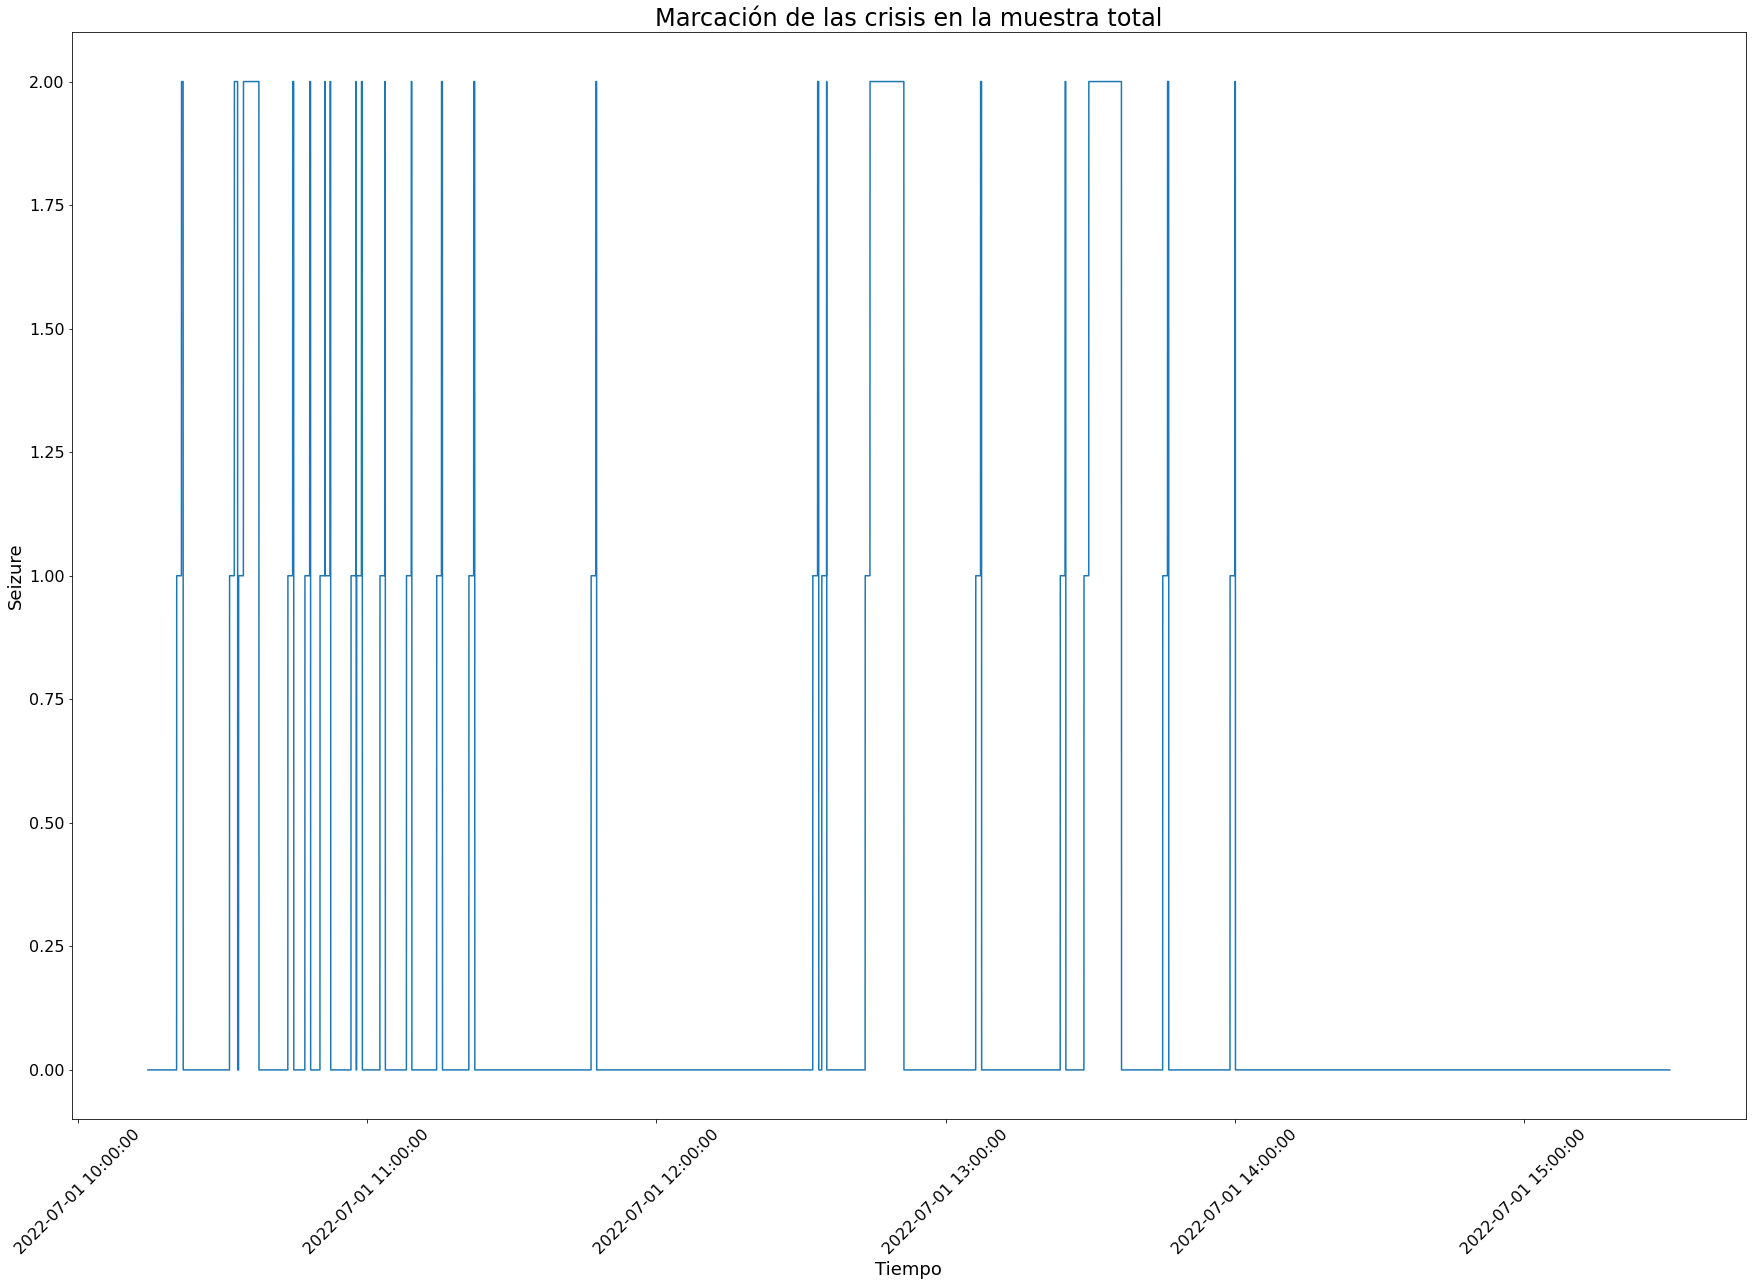

**---Procesando Crisis 1 en paralelo---****---Procesando Crisis 2 en paralelo---**

**---Procesando Crisis 3 en paralelo---**
**---Procesando Crisis 4 en paralelo---**
**---Procesando Crisis 5 en paralelo---**
**---Procesando Crisis 6 en paralelo---**
**---Procesando Crisis 7 en paralelo---**
**---Procesando Crisis 8 en paralelo---**
**---Procesando Crisis 9 en paralelo---**
**---Procesando Crisis 10 en paralelo---**
Tiempo inicial: Tiempo inicial:  2022-07-01 10:28:58
Tiempo final:    2022-07-01 10:34:39
Indice inicial:  432500
Indice final:    603000
 2022-07-01 10:18:00
Tiempo final:    2022-07-01 10:23:21
Indice inicial:  103500
Indice final:    264000
Tiempo inicial:  2022-07-01 10:54:10
Tiempo final:    2022-07-01 10:59:15
Indice inicial:  1188500
Indice final:    1341000
Tiempo inicial:  2022-07-01 10:47:44
Tiempo final:    2022-07-01 10:53:00
Indice inicial:  995500
Indice final:    1153500
Tiempo inicial:  2022-07-01 10:32:23
Tiempo final:    2022-07-01 10:37:40
Indice inicial

Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JESUS/Muestra1/crisis
Número de muestras con estado ictal     Seizure = 2: 2167
Número de muestras con estado preictal  Seizure = 1: 10000
Número de muestras sin estado ictal     Seizure = 0: 19996
Tamaño mínimo de muestra entre categorías: 2167
Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JESUS/Muestra1/crisis
Número de muestras con estado ictal     Seizure = 2: 2334
Número de muestras con estado preictal  Seizure = 1: 18603
Número de muestras sin estado ictal     Seizure = 0: 11332
Tamaño mínimo de muestra entre categorías: 2334
Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JESUS/Muestra1/crisis
Número de muestras con estado ictal     Seizure = 2: 2167
Número de muestras con estado preictal  Seizure = 1: 10000
Número de muestras sin estado ictal     Seizure = 0: 19996
Tamaño mínimo de muestra entre categorías: 2167
Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JE

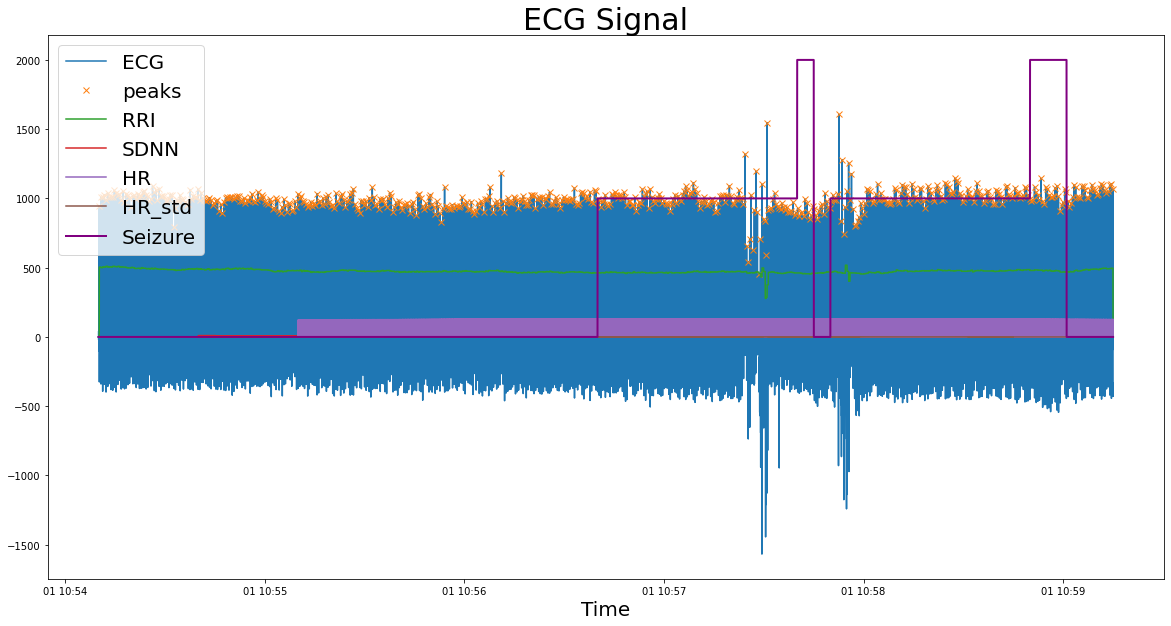

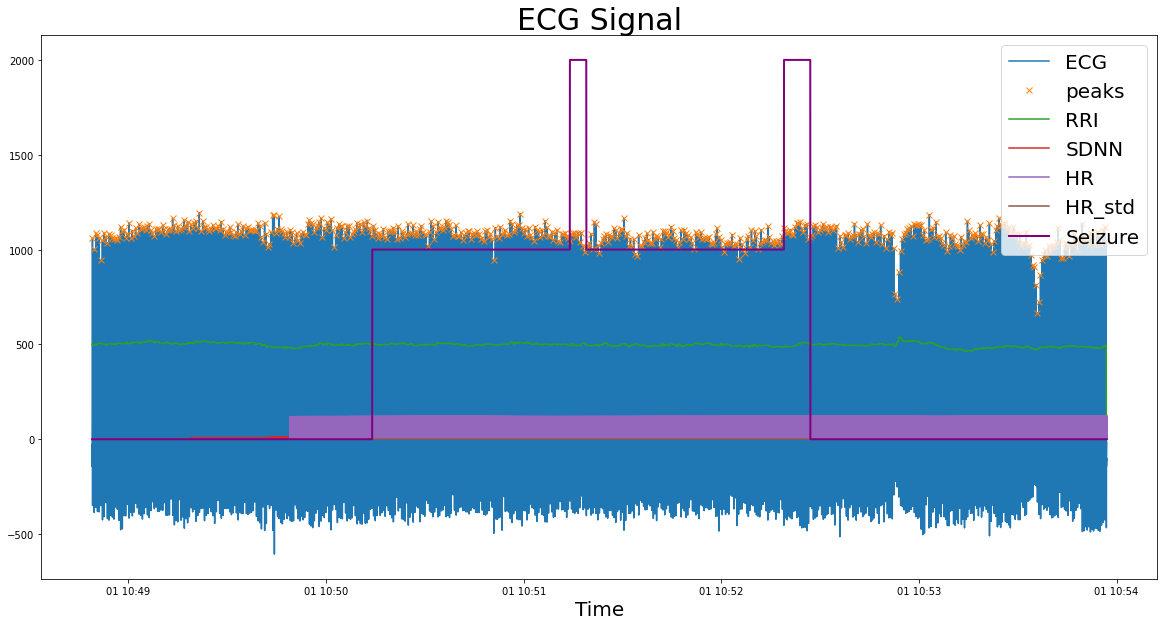

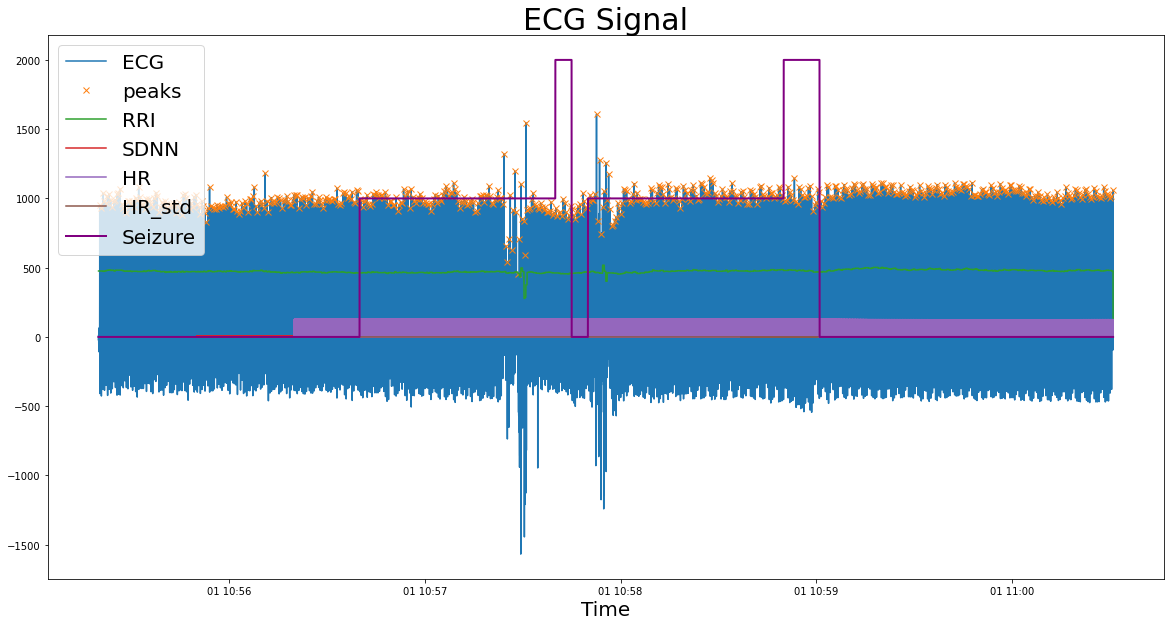

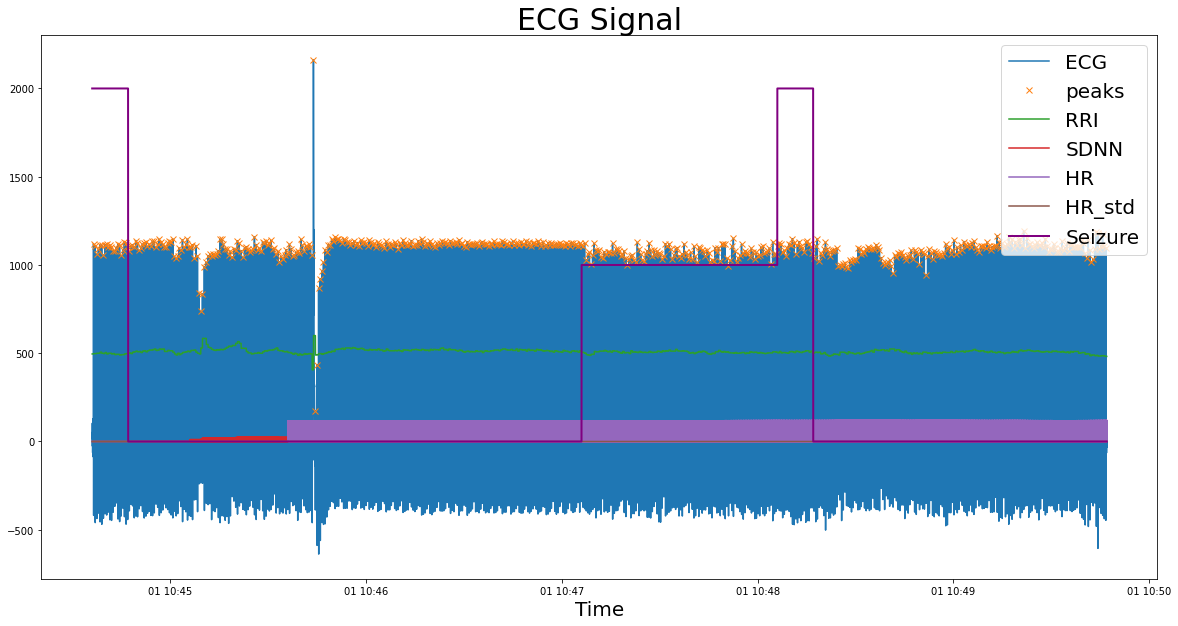

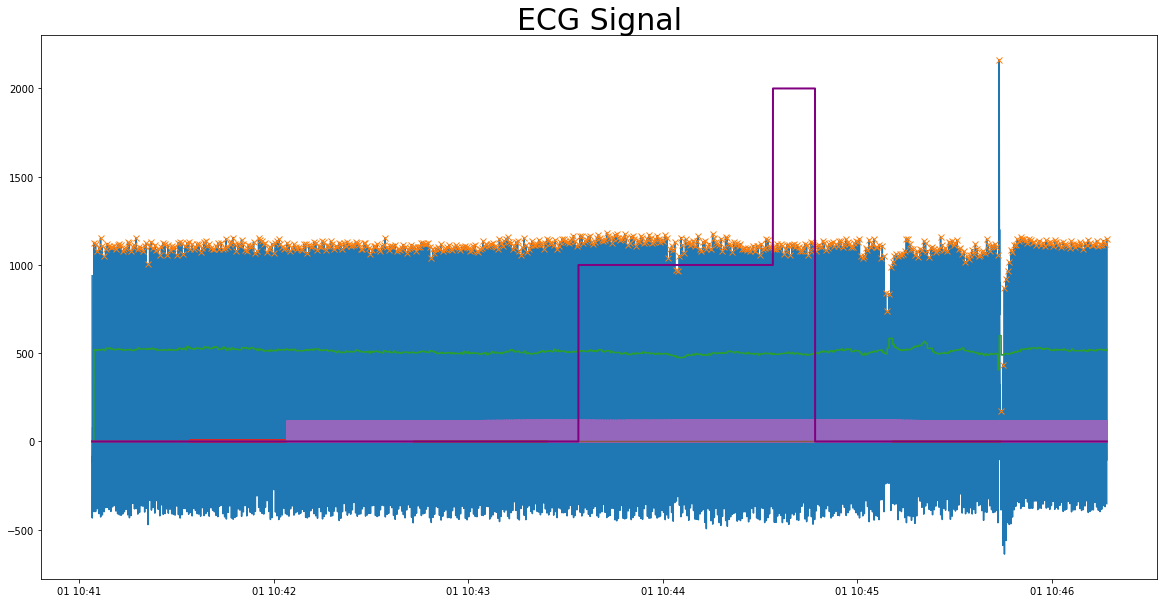

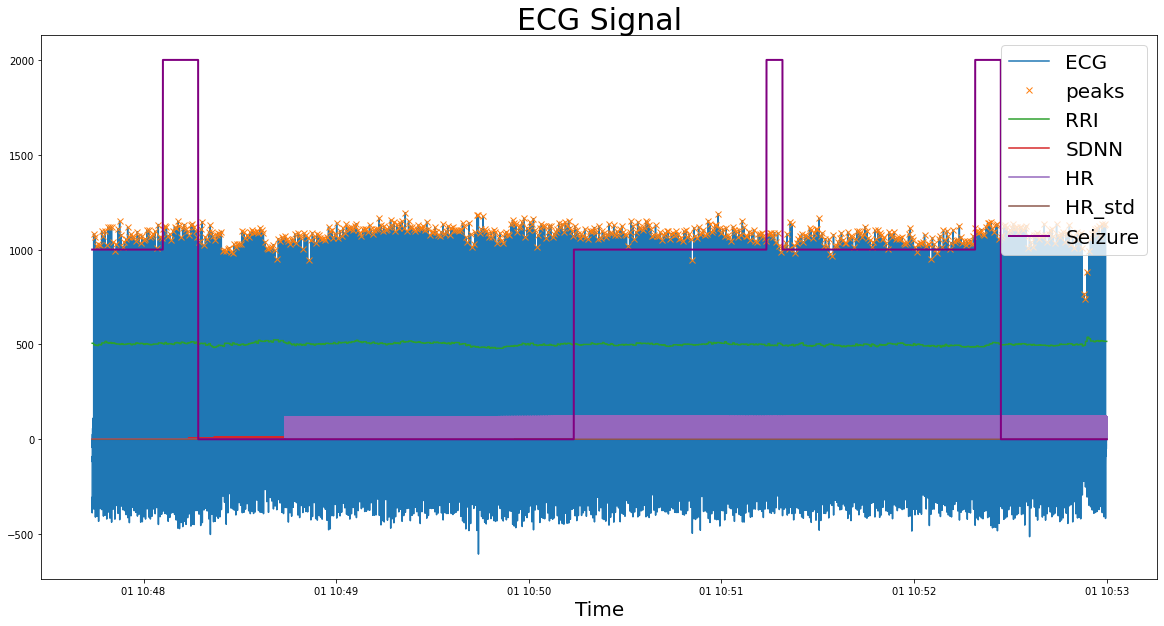

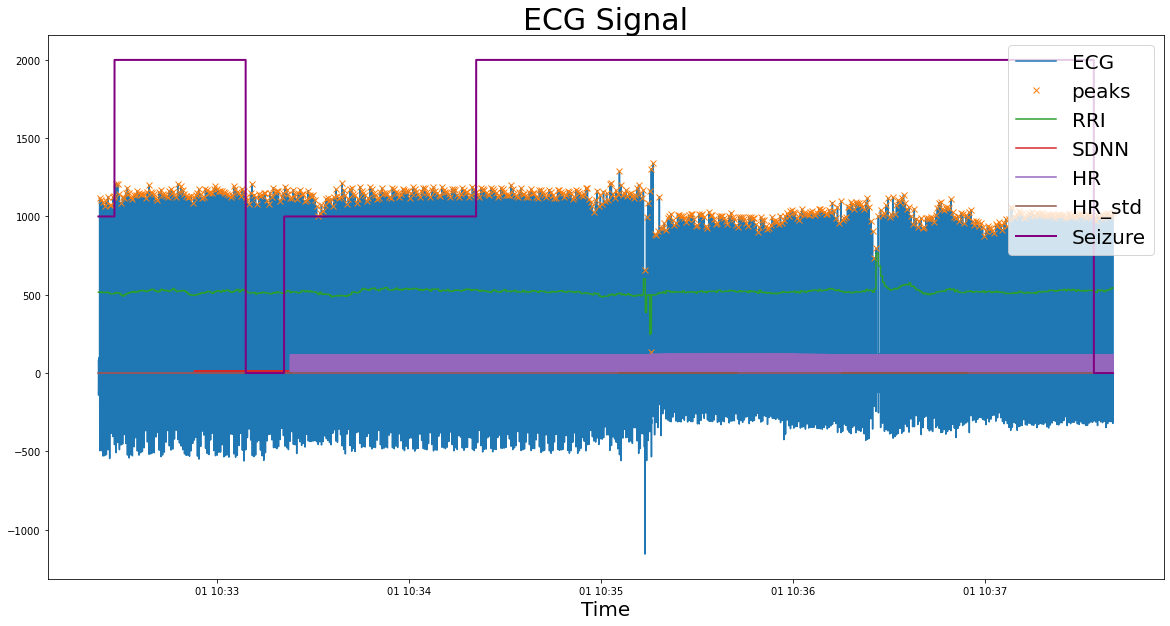

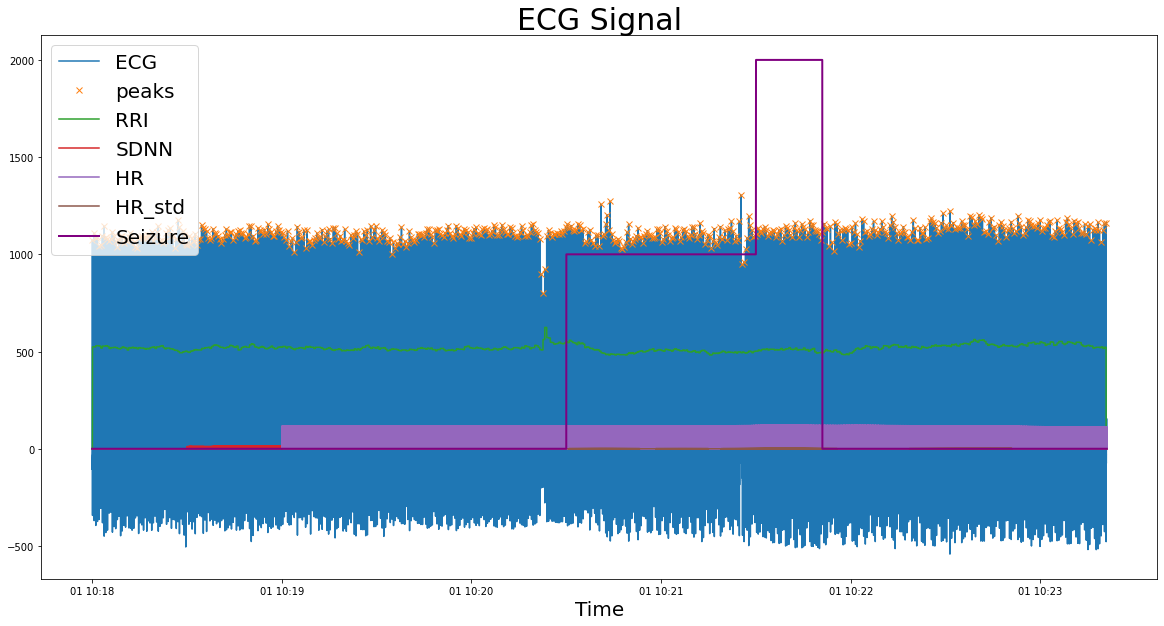

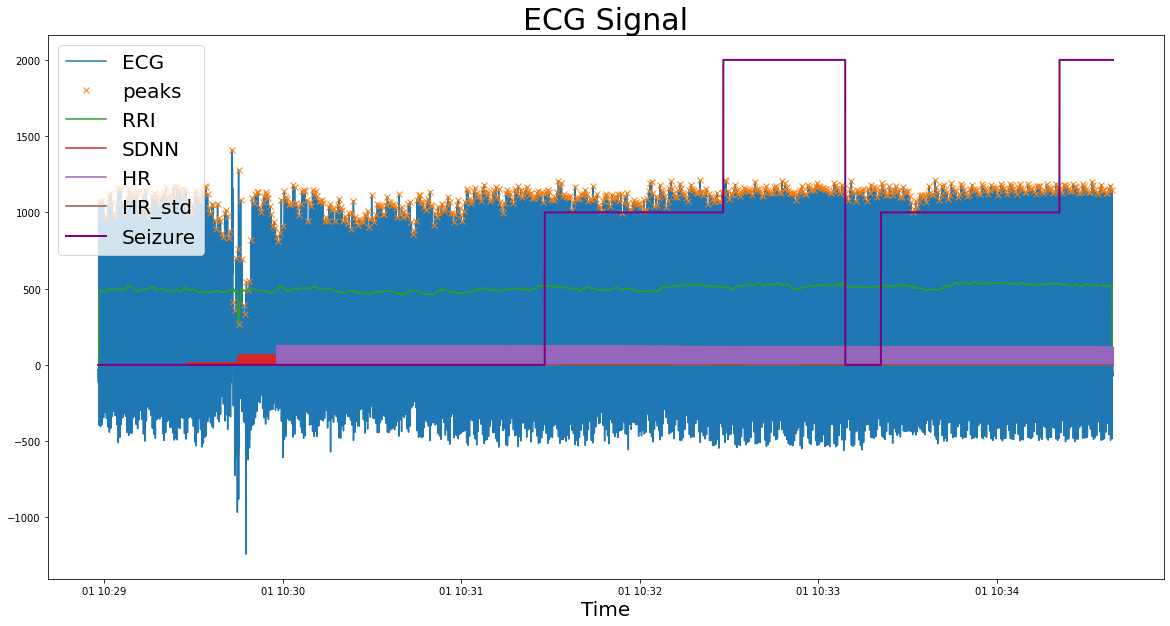

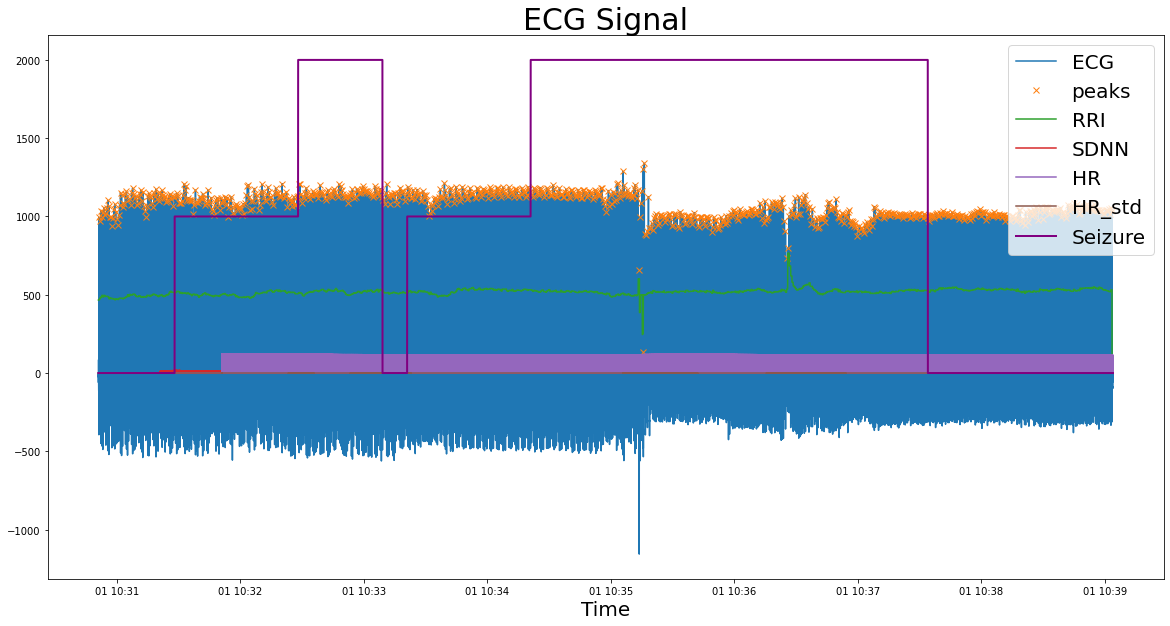

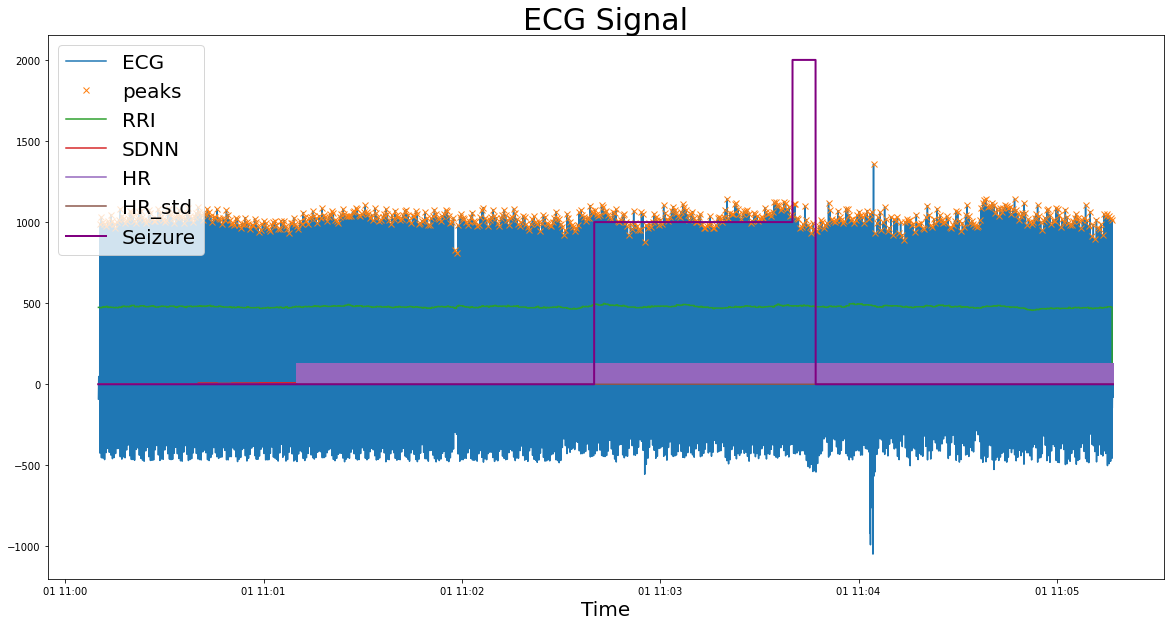

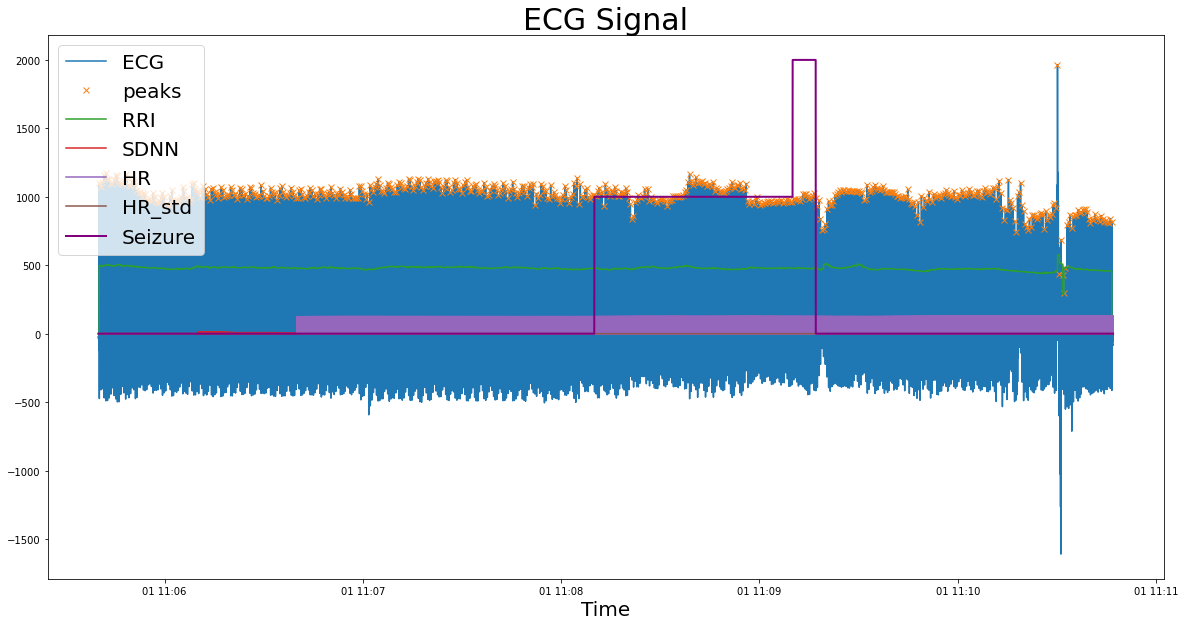

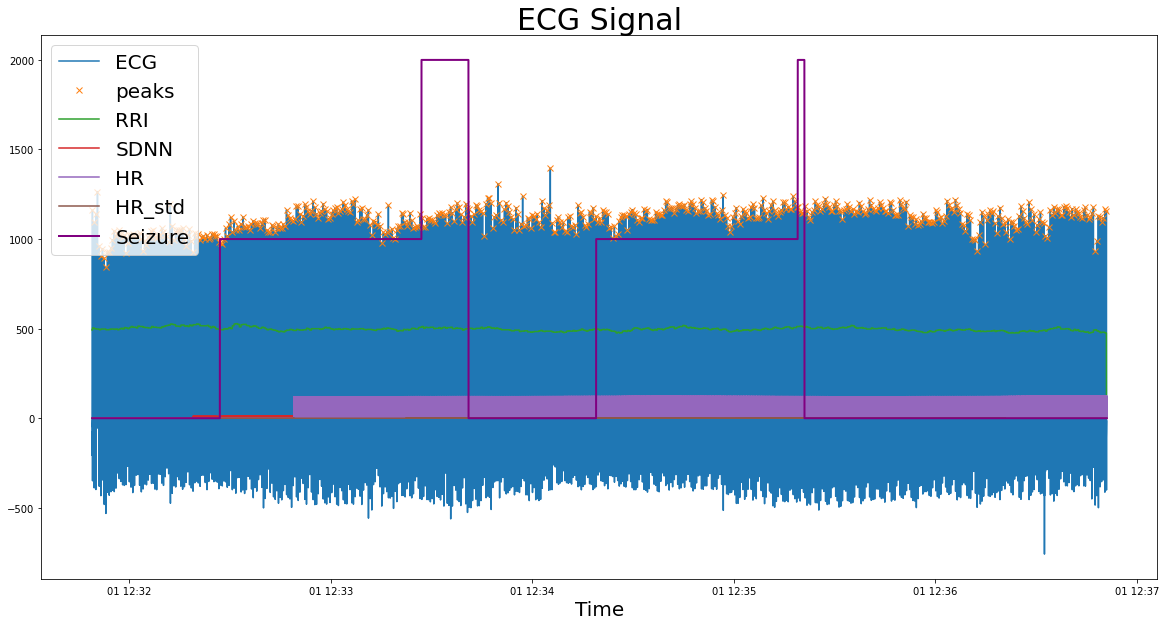

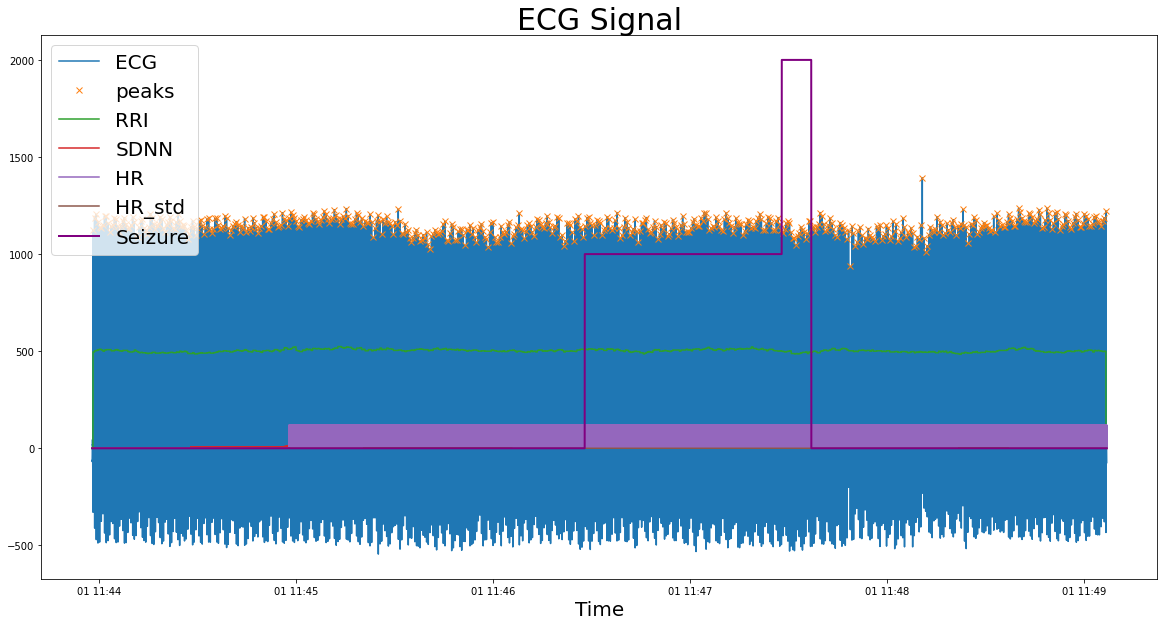

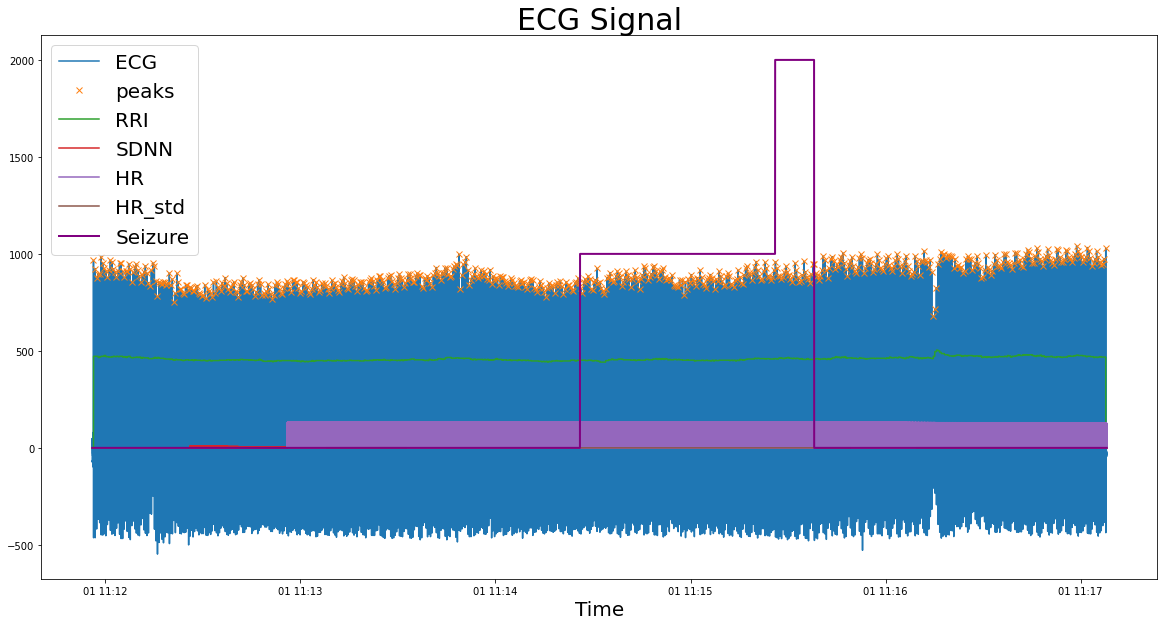

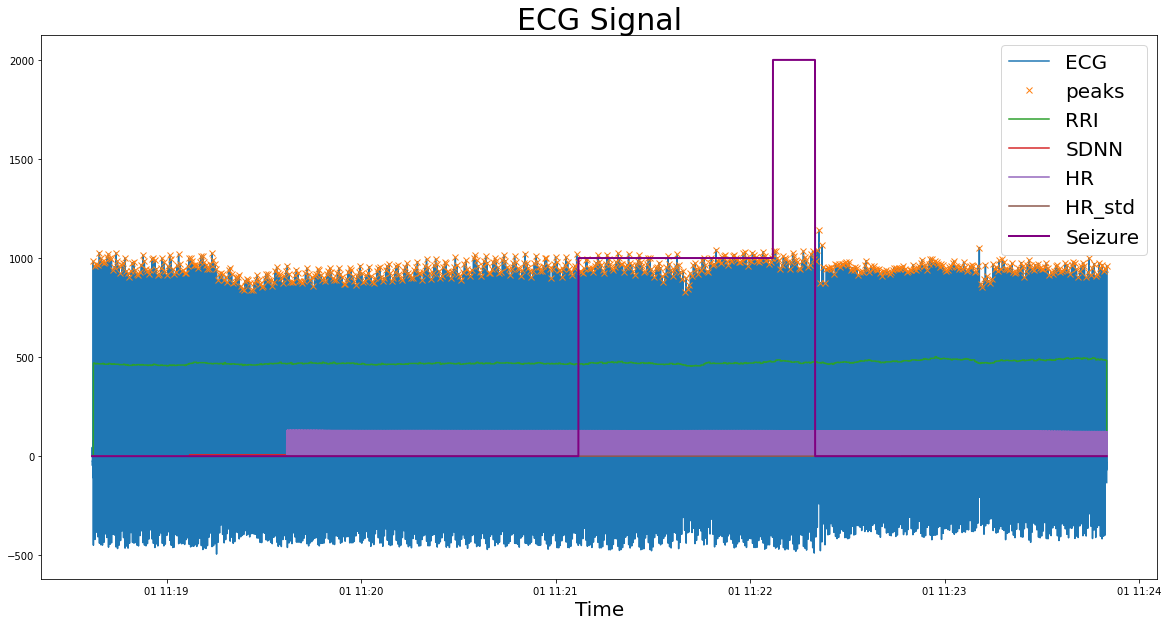

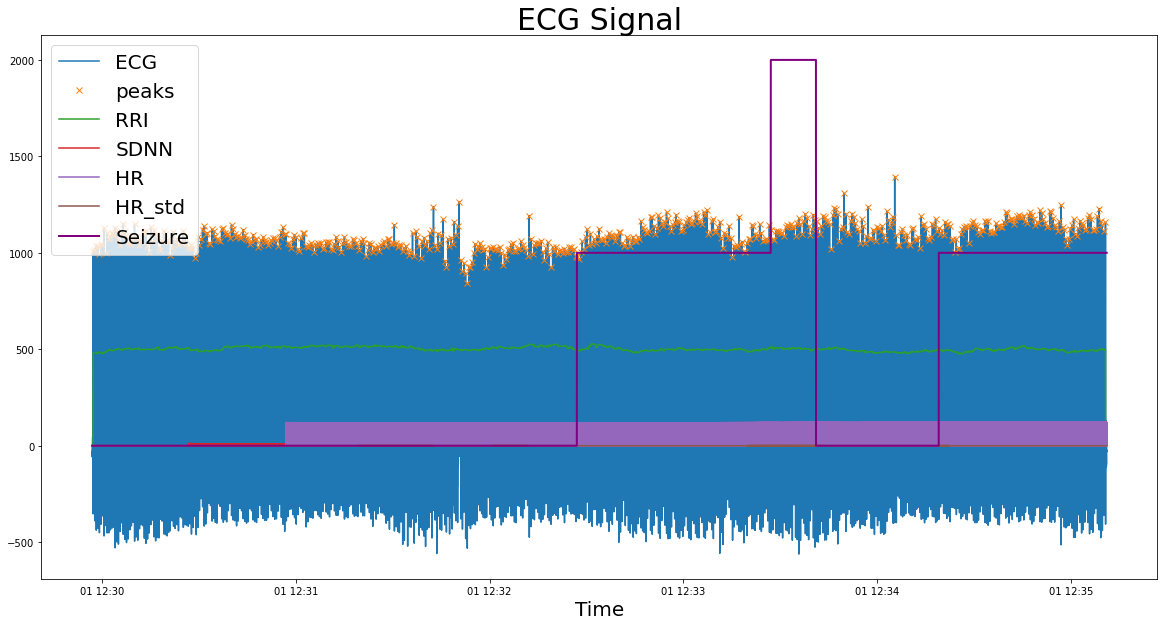

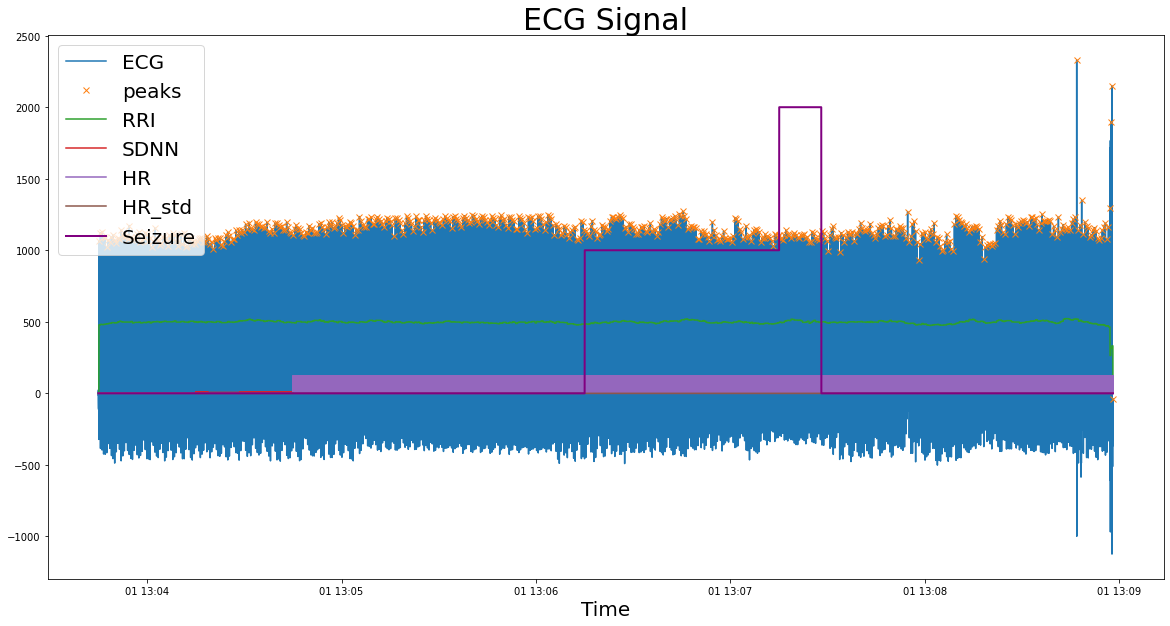

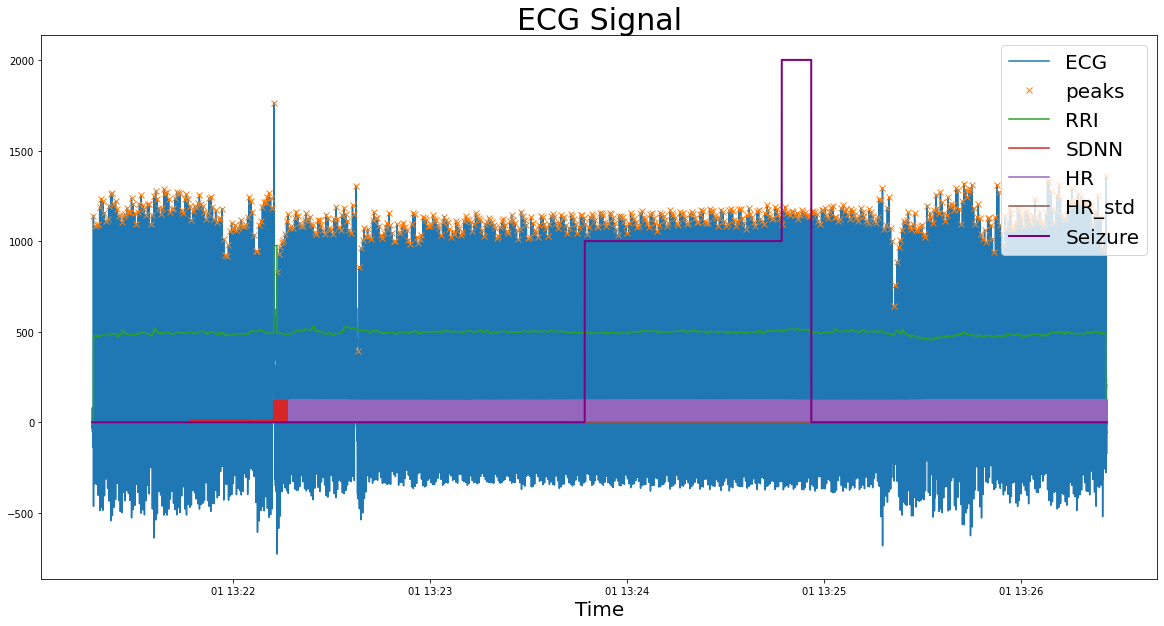

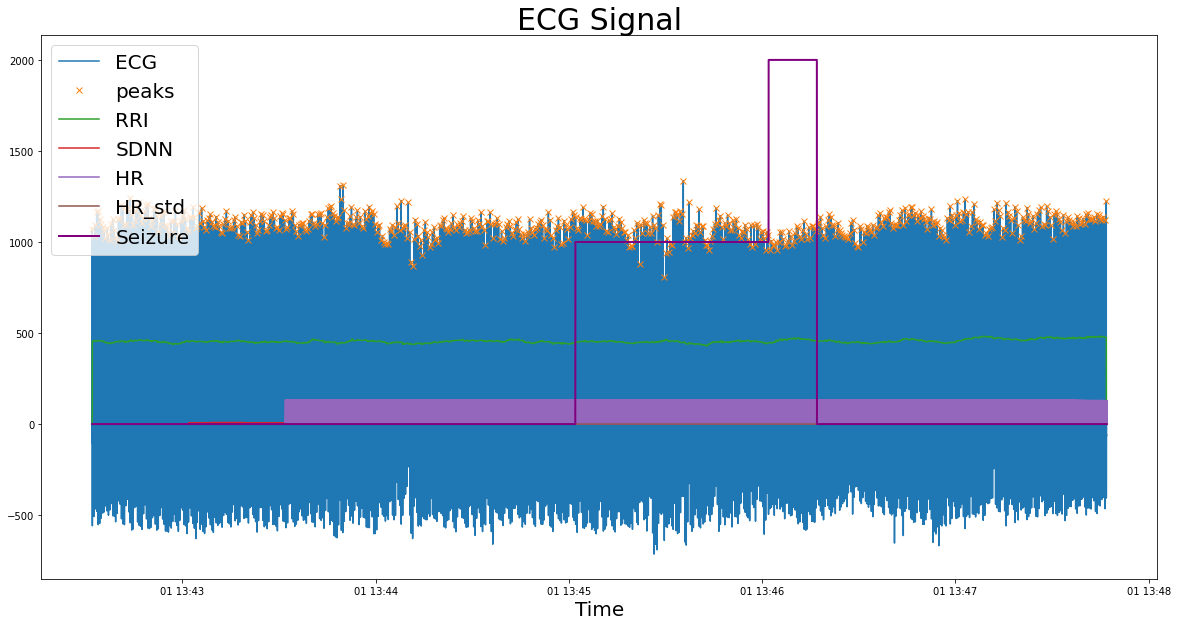

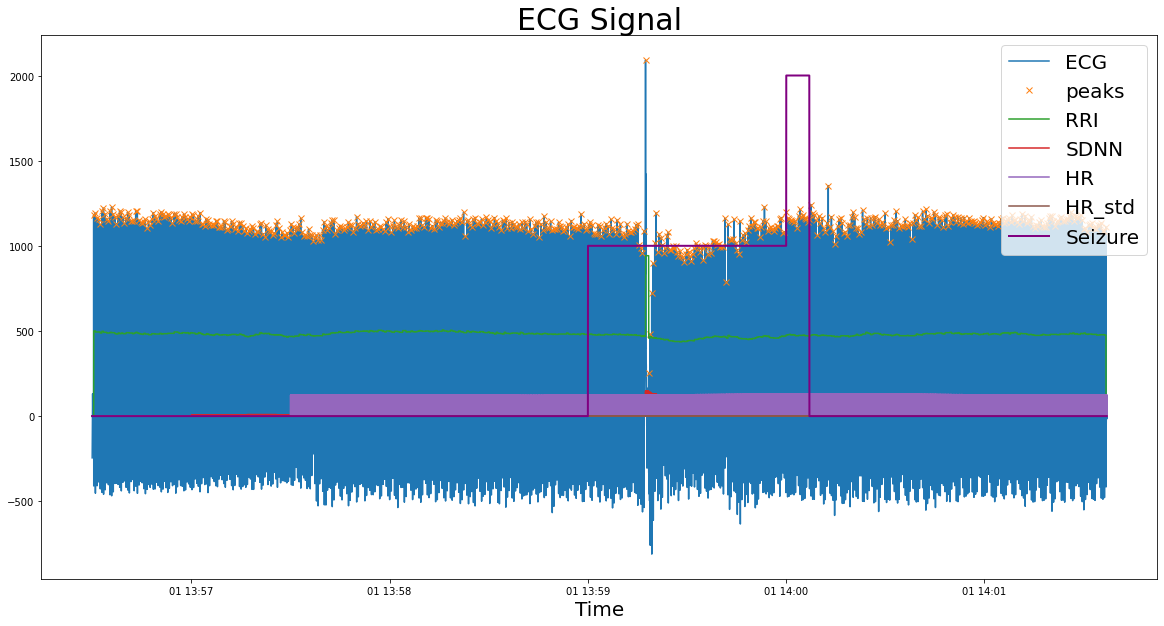

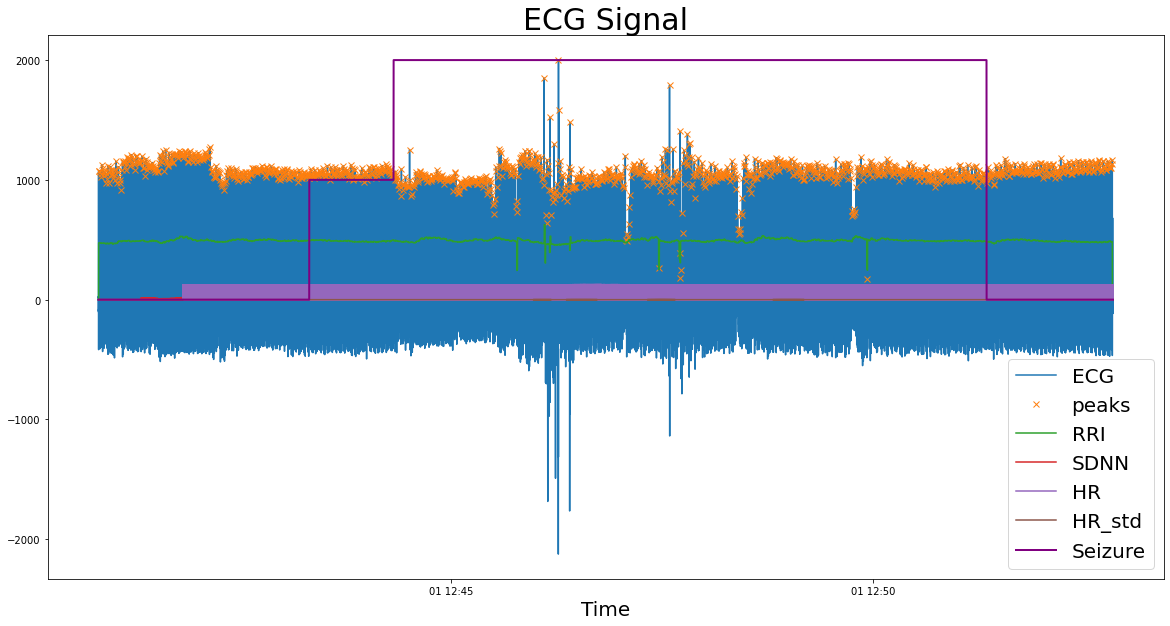

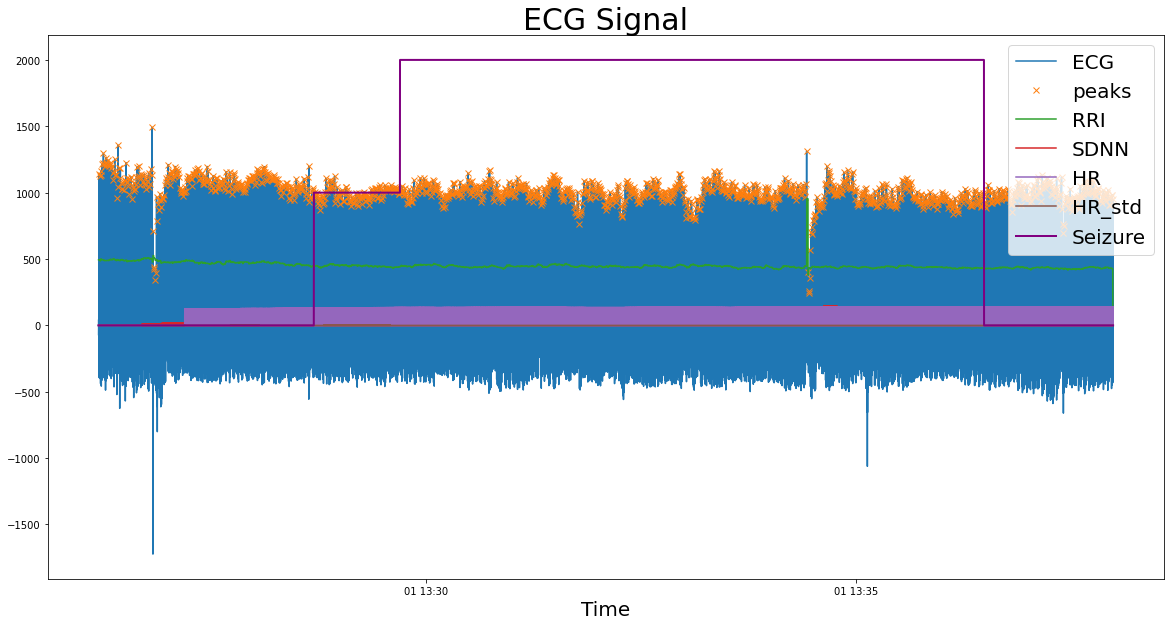

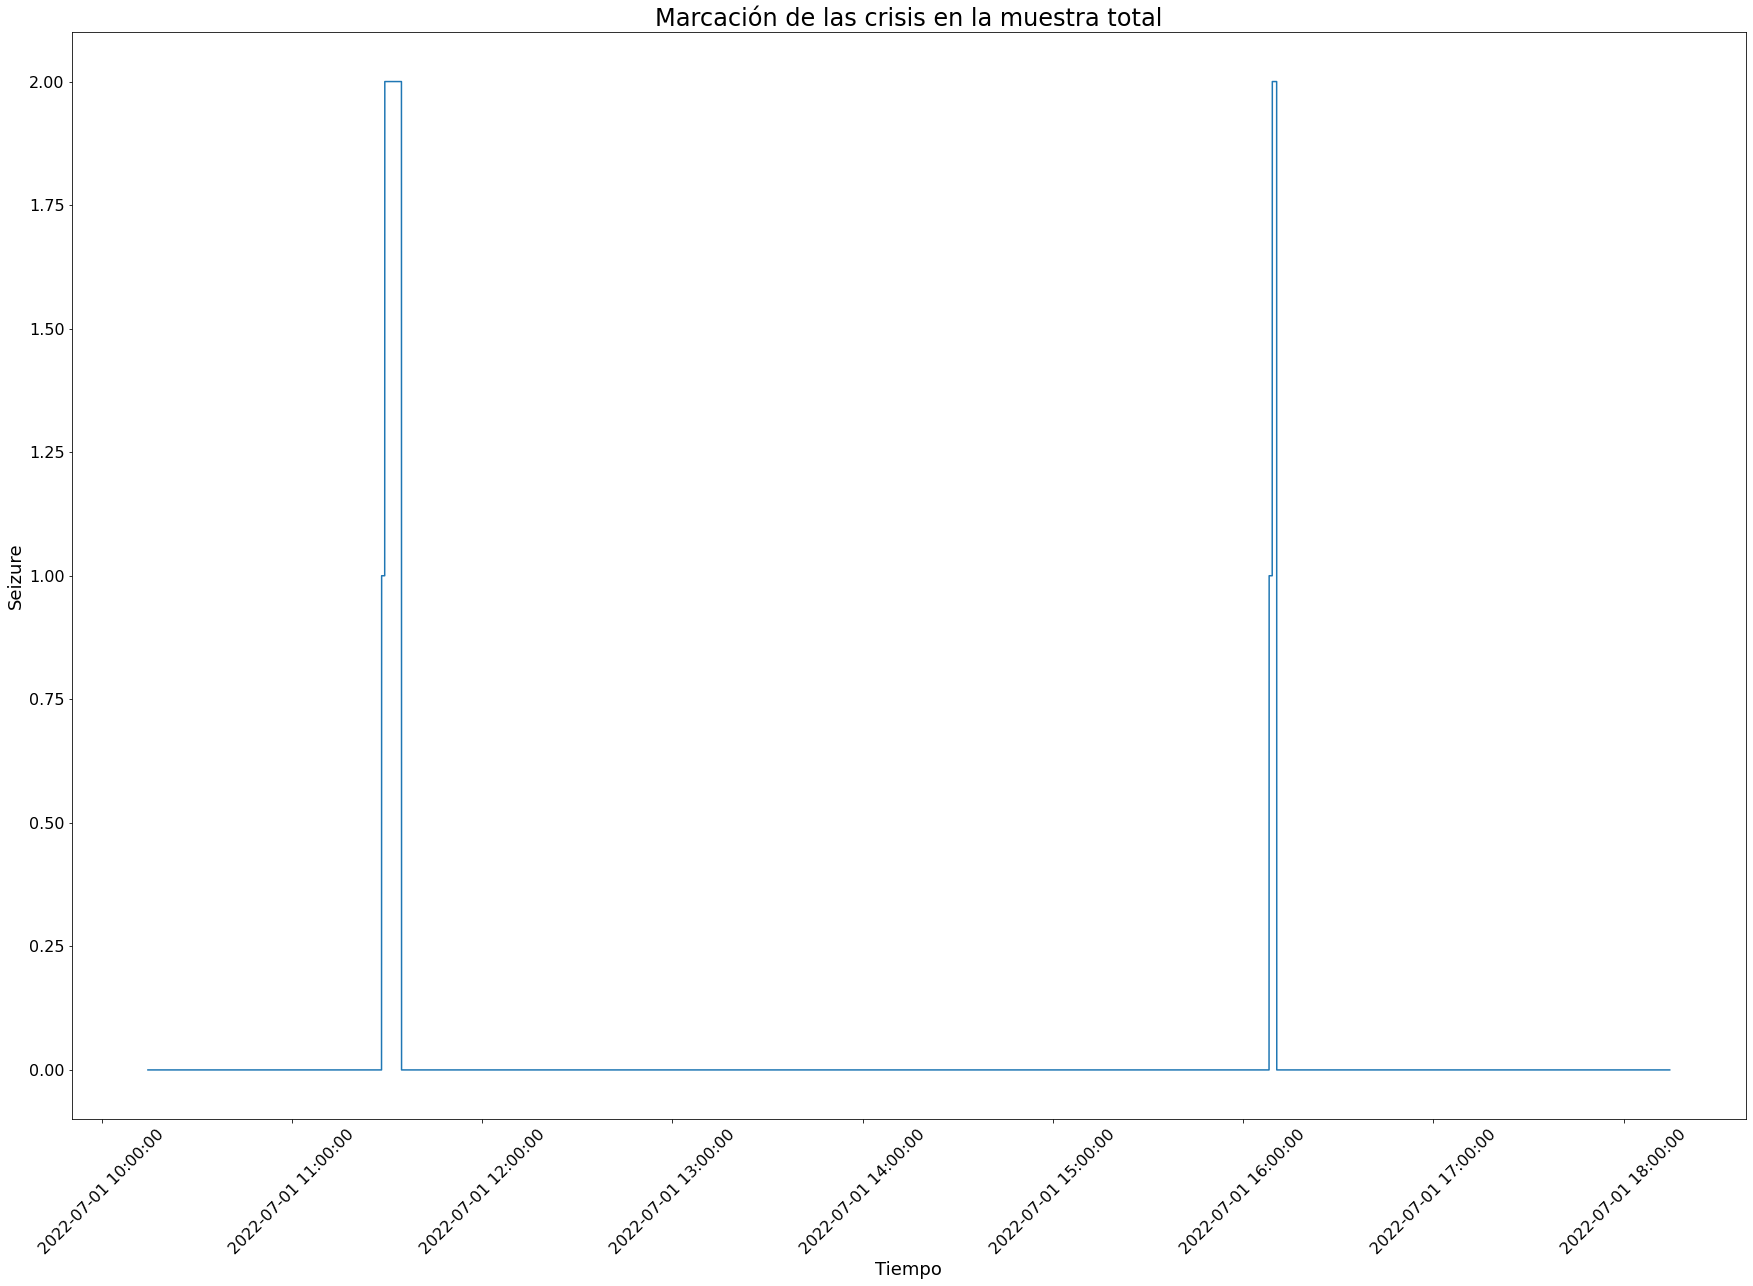

**---Procesando Crisis 1 en paralelo---**
**---Procesando Crisis 2 en paralelo---**
Tiempo inicial:  2022-07-01 11:25:44
Tiempo final:    2022-07-01 11:36:01
Indice inicial:  2135500
Indice final:    2444000
Tiempo inicial:  2022-07-01 16:05:40
Tiempo final:    2022-07-01 16:12:04
Indice inicial:  10533500
Indice final:    10725500
Número de muestras con estado ictal     Seizure = 2: 14001
Número de muestras con estado preictal  Seizure = 1: 10000
Número de muestras sin estado ictal     Seizure = 0: 19989
Tamaño mínimo de muestra entre categorías: 10000
Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JESUS/Muestra2/crisis
Número de muestras con estado ictal     Seizure = 2: 52834
Número de muestras con estado preictal  Seizure = 1: 10000
Número de muestras sin estado ictal     Seizure = 0: 19985
Tamaño mínimo de muestra entre categorías: 10000
Archivo guardado en: /Users/soldash/Documents/Tesis/python/Datos/JESUS/Muestra2/crisis
Archivo paciente exportado!!
¡Todos los 

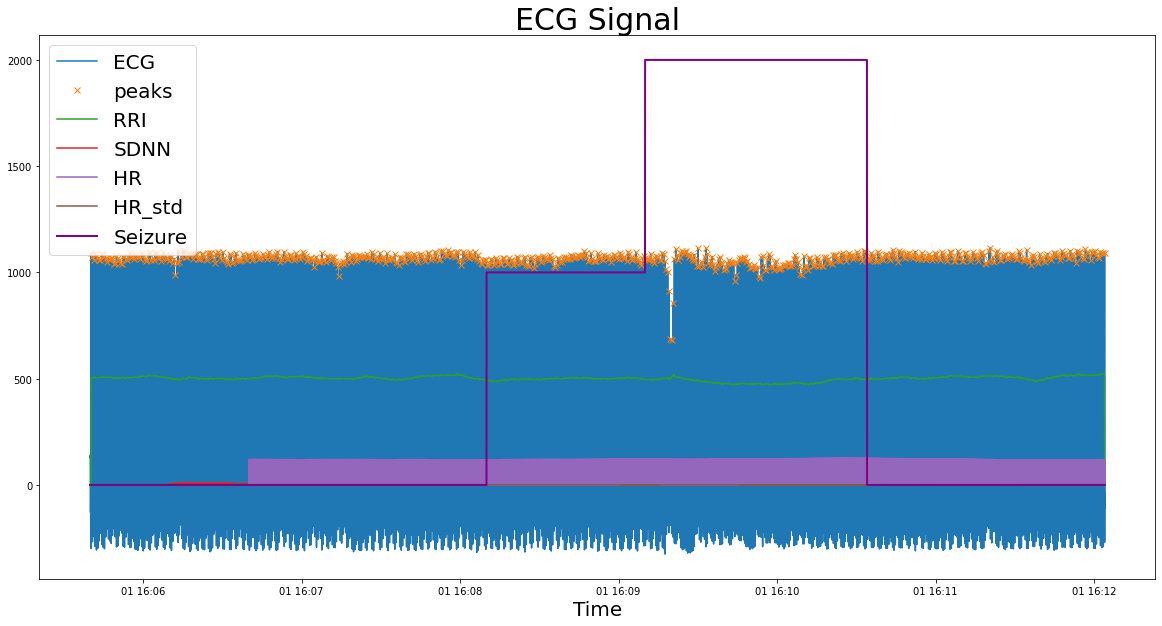

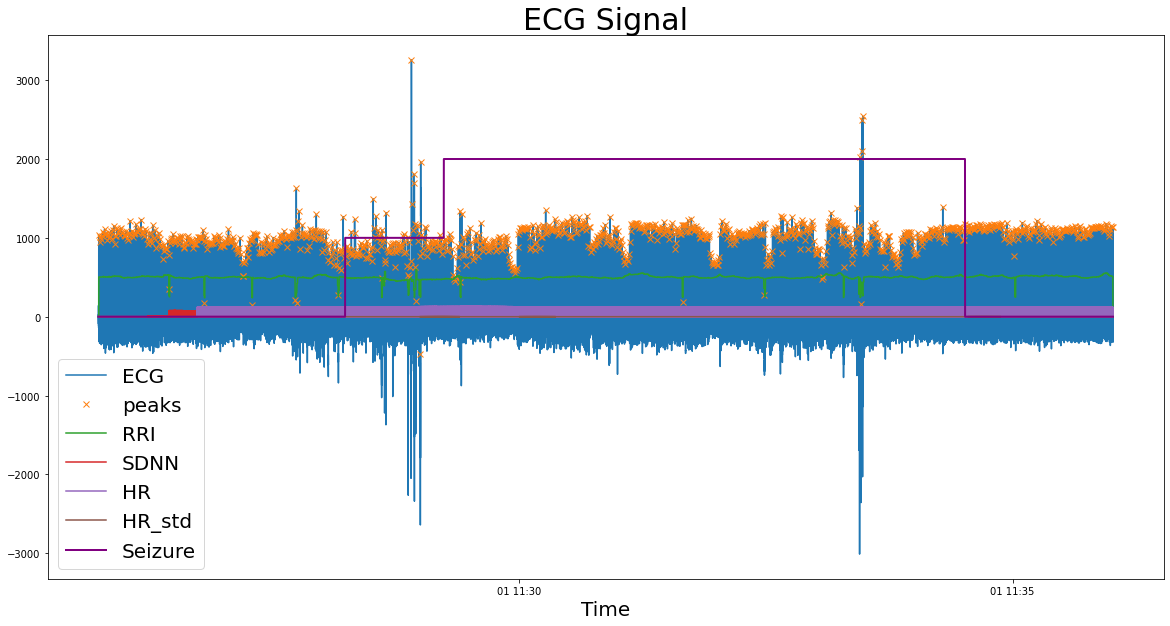

In [32]:
%%time

#Definir valor en segundos
delta_window = 15
HR_window=30
frecuency_window = 60

preictal_time = 60
sample_rate = 3


exportpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/"

# Leer el archivo CSV
file_info_df = pd.read_csv('/Users/soldash/Documents/Tesis/python/Datos/mainfiles.csv', comment='#')

# Iterar sobre cada fila del DataFrame
for index, row in file_info_df.iterrows():
    # Obtener mainpath y filename de la fila actual
    mainpath = row['mainpath']
    filename = row['filename']
    
    # Llamar a la función process_and_export_data
    process_and_export_data(mainpath, filename, exportpath, delta_window, HR_window, frecuency_window, preictal_time, sample_rate)  


path = "/Users/soldash/Documents/Tesis/python/Datos/Todas/"  # Reemplaza con la ruta a carpeta específica
todos_los_archivos = os.listdir(path)
archivos_csv = [f for f in todos_los_archivos if f.endswith('.csv')]

lista_dataframes = []

for archivo in archivos_csv:
    ruta_completa = os.path.join(path, archivo)
    df = pd.read_csv(ruta_completa)
    lista_dataframes.append(df)

dataframe_final = pd.concat(lista_dataframes, ignore_index=True)

dataframe_final.to_csv(path + 'dataframe_concatenado.csv', index=False)

print("¡Todos los archivos han sido procesados!")




In [30]:
from concurrent.futures import ThreadPoolExecutor

def process_single_crisis(data, crisis, sampling_interval, delta_window, HR_window, frecuency_window, sample_rate, mainpath, index):
    print(f"**---Procesando Crisis {index + 1} en paralelo---**")
    
    ts, tf = calculate_ts(data, crisis, sampling_interval)
    sampleDf_processed = process_ECG_data(data, ts, tf, delta_window, HR_window, frecuency_window, sampling_interval, sample_rate)
    sampleDf_processed, min_sample_size = equalize_samples(sampleDf_processed)
    export_seizure_data(sampleDf_processed, min_sample_size, mainpath, str(index + 1))

def process_and_export_data(mainpath, filename, exportpath, delta_window=15, HR_window=30, frecuency_window=60, preictal_time=24, sample_rate = 30):
    # Cargar datos y obtener intervalo de muestreo
    data, sampling_interval = load_data(mainpath, filename)
    
    # Marcar y graficar las crisis
    data, crises = mark_and_plot_seizures(mainpath, data, preictal_time, sampling_interval)

    # Procesar cada crisis en paralelo
    with ThreadPoolExecutor(max_workers=5) as executor:
        futures = [executor.submit(process_single_crisis, data, crisis, sampling_interval, delta_window, HR_window, frecuency_window, sample_rate, mainpath, index) for index, crisis in enumerate(crises)]
    
    # Esperar a que todas las crisis sean procesadas
    for future in futures:
        future.result()

    # Exportar datos totales
    export_total_data(mainpath, crises, filename, exportpath)


In [13]:
import pandas as pd
from datetime import datetime
import time

def load_data(mainpath, filename, date="2022/07/01"):
    start_time = time.time()

    # Usar el administrador de contexto para abrir archivos.
    with open(mainpath + filename, "r") as datatitle:
        info = datatitle.readline().strip().split(" ")

    # Cálculos relacionados con la fecha de inicio.
    StartHour = info[-1].split("=")  # Obtener la última posición y dividirla.
    StartDate = datetime.strptime(date + " " + StartHour[1], '%Y/%m/%d %H:%M:%S')

    # Extrayendo SamplingInterval para la frecuencia
    sampling_interval = None

    # Buscando el valor de SamplingInterval en la lista
    for item in info:
        if "SamplingInterval[ms]=" in item:
            sampling_interval = item.split("=")[-1]
            sampling_interval = int(float(sampling_interval))
            break

    if not sampling_interval:
        raise ValueError("SamplingInterval[ms] no encontrado en el archivo.")

    freq_str = f"{sampling_interval}ms"
    print(f"Tiempo de muestreo identificado: {freq_str}")

    print("Cargando Datos...")
    # Carga de los datos utilizando pandas.
    # Si tu archivo es extremadamente grande, considera el parámetro 'chunksize'
    data = pd.read_csv(mainpath+filename, sep="\s+", skiprows=[0], usecols=['X5-X6'])
    data["X5-X6"] = -data["X5-X6"]  # Invertir la señal

    # Creación de la columna de tiempo.
    df_times = pd.date_range(start=StartDate, periods=len(data), freq=freq_str)
    data["Time"] = df_times

    # Renombrar columna y asignar nuevas columnas con valores predeterminados.
    data = data.rename(columns={'X5-X6': 'ECG'}).assign(
        Seizure=0, RRI=0, SDNN=0, HR=0, HR_std=0, NN50=0, 
        pNN50=0, HF=0, LF=0, Total_power=0, LF_HF=0
    )

    print("---Datos cargados en %s seconds ---" % (time.time() - start_time))

    return data, sampling_interval


In [6]:
import re

def validar_formato(s):
    formato_1 = r"^\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d{6}$"
    
    if re.match(formato_1, s):
        return False
    
    return True

def generate_date_from_time(time, date="2022/07/01"):
    if validar_formato(time):
        return f"{date} {time}"
    return time
    

def putSeilzure(df, start_date, end_date, preictal_time, sampling_interval):
    start_date = int(df[df["Time"] == start_date].index[0])
    preictal_date = start_date - seconds_to_samples(preictal_time, sampling_interval)
    end_date = int(df[df["Time"] == end_date].index[0])
    df.loc[preictal_date: start_date,"Seizure"] = 1
    df.loc[start_date: end_date,"Seizure"] = 2
   

    
def mark_and_plot_seizures(mainpath, data, preictal_time, sampling_interval):
    # Listado de crisis
    crises_df = pd.read_csv(mainpath +'crises.csv', comment='#')
    
    # Convierte el DataFrame en una lista de tuplas
    crises = list(zip(crises_df['start_time'], crises_df['end_time']))
    print(crises)

    # Iterar sobre el listado y marcar cada crisis en el DataFrame
    for start_time, end_time in crises:
        start_date = generate_date_from_time(start_time)
        end_date = generate_date_from_time(end_time) 
        putSeilzure(data, start_date, end_date, preictal_time, sampling_interval)

    #plt.figure(figsize=(30,20))

    # Título de la gráfica
    #plt.title('Marcación de las crisis en la muestra total', fontsize=24)

    # Etiquetas de los ejes
    #plt.xlabel('Tiempo', fontsize=18)
    #plt.ylabel('Seizure', fontsize=18)

    # Tamaño de las marcas de los ejes
    #plt.tick_params(axis='both', which='major', labelsize=16)

    #plt.plot(data["Time"], data["Seizure"])

    # Ajustar el formato de las etiquetas del eje x para que muestre fecha y hora
    #ax = plt.gca()
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Rotar las etiquetas para una mejor visualización
    #plt.xticks(rotation=45)

    #plt.show()

    return data, crises

In [7]:
def calculate_ts(data, crisis, sampling_interval):
       
    ts =  int(data[data["Time"] == generate_date_from_time(crisis[0])].index[0])
    tf =  int(data[data["Time"] == generate_date_from_time(crisis[1])].index[0])
    #Revisar si en algun caso es conveniente tener en cuenta tiempo del periodo preictal
    ts = ts - (seconds_to_samples((preictal_time + 150), sampling_interval))
    tf = tf + (seconds_to_samples(90, sampling_interval))
    if ts < 0:
        ts = 0
    ts = data["Time"].loc[ts]
    tf = data["Time"].loc[tf]
    return ts, tf  


## Generación de caracteristicas

Se utilizará el siguiente codigo para poder realizar desarrollos sobre una parte del codigo sin necesidad de esperar procesamientos largos en toda la muestra

In [8]:
import numpy as np
import pyhrv.frequency_domain as fd
import pyhrv.time_domain as td

pd.options.mode.chained_assignment = None  # default='warn'

def seconds_to_samples(x, sampling_interval):
    #se multiplica por 1000 debido a que esta en milisegundos
    return int(x*1000)/sampling_interval

def process_ECG_data(data, ts, tf, delta_window, HR_window, frecuency_window, sampling_interval, sample_rate=30):
   
    ts = int(data[data["Time"] == ts].index[0])
    #interval = int(interval / 2) #como la señal esta muestreada a 2ms se divide para encontrar el tiempo adecuado
    #tf = ts + interval
    tf = int(data[data["Time"] == tf].index[0])
    

    #Se pasan los valores en segundos a muestras: dividiendo en la frecuencia de muestreo (usualmente 2 ms)
    delta_window = seconds_to_samples(delta_window, sampling_interval)
    HR_window=seconds_to_samples(HR_window, sampling_interval)
    frecuency_window = seconds_to_samples(frecuency_window, sampling_interval)
    #----#

    fbands = {'ulf': (0.0, 0.1), 'vlf': (0.1, 0.2), 'lf': (0.2, 0.3), 'hf': (0.3, 0.4)}


    print("Tiempo inicial: ", str(data.loc[ts]["Time"]))
    print("Tiempo final:   ", str(data.loc[tf]["Time"]))
    print("Indice inicial: ", str(ts))
    print("Indice final:   ", str(tf))
    #Se toma el intervalo de interés
    sampleDf = data[ts:tf]

    #Hallar los picos
    peaks, properties = find_peaks(sampleDf["ECG"], prominence=[300,8000], width=1,distance = 120)
    #Ajustar los picos al tiempo de la muestra
    peaks = peaks+ts

    time_RRI = []

    for i in range(len(peaks)):
        if i != 0:
            #RRI

            RRI = sampleDf["Time"][peaks[i]] - sampleDf["Time"][peaks[i-1]] #Calcula distancia entre el pico y el pico anterior                                   
            RRI = (RRI.microseconds + (RRI.seconds * 1000000))/1000 #Convierte el valor a ms
            time_RRI.append(RRI) #se agrega al arreglo de valores RRI
            sampleDf.loc[peaks[i-1]:peaks[i], ("RRI")] = RRI #Se quita debido a que estaba afectando la muestra original
            


    for i in range(sampleDf.index.start,sampleDf.index.stop, sample_rate):

        #SDNN
        startWindow = i - int(delta_window * 2)
        finishWindow = i
        if startWindow > ts and  finishWindow < tf:
            window = sampleDf.loc[startWindow:finishWindow]
            window.drop_duplicates(subset ="RRI", keep = 'last', inplace = True)
            window = window[window["RRI"] > 0]
            sampleDf["SDNN"][i] = window.std()["RRI"]
            #NN50 y pNN50
            resultNN50 = td.nn50(window["RRI"])
            sampleDf["NN50"][i] = resultNN50["nn50"]
            sampleDf["pNN50"][i] = resultNN50["pnn50"]

        #HR
        startHR = i - int(HR_window * 2) 
        #finishHR = i + int(HR_window)
        finishHR = i
        if startHR > ts and  finishHR < tf:
            sampleDf["HR"][i]=len(peaks[(peaks > startHR) & (peaks < finishHR)])

        #Frecuencia
        startWindow = i - int(frecuency_window * 2)
        #finishWindow = i + int(frecuency_window)
        finishWindow = i
        
        if startWindow > ts and  finishWindow < tf:
            window = sampleDf.loc[startWindow:finishWindow]
            window.drop_duplicates(subset ="RRI", keep = 'last', inplace = True)
            window = window[window["RRI"] > 0]
            result = fd.welch_psd(window["RRI"], mode='dev', fbands=fbands)
            sampleDf["HF"][i] = result[0]["fft_abs"][3]
            sampleDf["LF"][i] = result[0]["fft_abs"][2]
            sampleDf["Total_power"][i] = result[0]["fft_total"]
            sampleDf["LF_HF"][i] = result[0]["fft_ratio"]



    for i in range(sampleDf.index.start,sampleDf.index.stop, sample_rate):
        startWindow = i - int(2 * delta_window)
        finishWindow = i
        #HR_std
        if startWindow > (ts + HR_window) and  finishWindow < (tf - HR_window):
            window = sampleDf.loc[startWindow:finishWindow]
            window = window[window["HR"] > 0]
            sampleDf["HR_std"][i] = window.std()["HR"]




    #Grafica los RRI
    #plt.figure(figsize=(25,15))       
    #plt.title("RRI")
    #plt.plot(time_RRI,"o")
    #plt.xlabel("# Samples")
    #plt.ylabel("RRI[ms]")

    #Grafica la señal con los picos detectados
    plt.figure(figsize=(20,10))
    plt.title("ECG Signal", fontsize=30)
    fig1 = plt.plot(sampleDf["Time"],sampleDf["ECG"])
    fig1 = plt.plot(sampleDf["Time"][peaks],sampleDf["ECG"][peaks], "x")
    fig1 = plt.plot(sampleDf["Time"],sampleDf["RRI"], "-")
    fig1 = plt.plot(sampleDf["Time"],sampleDf["SDNN"])
    fig1 = plt.plot(sampleDf["Time"],sampleDf["HR"])
    fig1 = plt.plot(sampleDf["Time"],sampleDf["HR_std"])
    fig1 = plt.plot(sampleDf["Time"],sampleDf["Seizure"]*1000, linewidth='2', color="purple")
    fig1 = plt.gca().legend(('ECG','peaks',"RRI","SDNN","HR","HR_std","Seizure"),prop={'size': 20})
    #fig1 = plt.vlines(x=sampleDf["Time"][peaks], ymin=data["ECG"][peaks] - properties["prominences"],ymax = data["ECG"][peaks], color = "C1")
    plt.xlabel("Time", fontsize=20)  # Ajusta el tamaño de la fuente para el eje X

    
    return sampleDf

In [9]:
def equalize_samples(sampleDf):
    """
    Igualar las muestras en cantidad y muestra información relevante.
    
    Parámetros:
    - sampleDf: DataFrame que contiene las muestras.
    
    Retorna:
    - sampleDf: DataFrame con las muestras igualadas en cantidad.
    - sample_size: Tamaño mínimo de las muestras por categoría.
    """
    
    # Igualar las muestras en cantidad
    sampleDf = sampleDf[(sampleDf["RRI"] > 0) & (sampleDf["HR"] > 0) & (sampleDf["LF_HF"] > 0)]
    
    # Conteo de muestras por categoría
    seizure_2_count = sampleDf[sampleDf["Seizure"] == 2].shape[0]
    seizure_1_count = sampleDf[sampleDf["Seizure"] == 1].shape[0]
    seizure_0_count = sampleDf[sampleDf["Seizure"] == 0].shape[0]
    
    # Determinar el tamaño de muestra mínimo
    sample_size = min(seizure_2_count, seizure_1_count, seizure_0_count)
    
    # Mostrar información
    print(f"Número de muestras con estado ictal     Seizure = 2: {seizure_2_count}")
    print(f"Número de muestras con estado preictal  Seizure = 1: {seizure_1_count}")
    print(f"Número de muestras sin estado ictal     Seizure = 0: {seizure_0_count}")
    print(f"Tamaño mínimo de muestra entre categorías: {sample_size}")
    
    return sampleDf, sample_size

In [10]:
import pandas as pd

def export_seizure_data(sampleDf, sample_size, mainpath, index, filename="crisis"):
    """ 
    Exporta datos de crisis, preictal y reposo a un archivo CSV.
    
    Args:
    - sampleDf (pd.DataFrame): DataFrame con los datos originales.
    - sample_size (int): Tamaño de muestra para cada estado (crisis, preictal, reposo).
    - mainpath (str): Ruta para guardar el archivo CSV.
    - filename (str, opcional): Nombre del archivo CSV. Por defecto es "crisis.csv".
    
    Returns:
    None
    """

    seilzure = sampleDf[sampleDf["Seizure"] == 2]
    preictal = sampleDf[sampleDf["Seizure"] == 1]
    reposo = sampleDf[sampleDf["Seizure"] == 0]

    seilzure_data = seilzure.sample(n=sample_size)
    preictal_data = preictal.sample(n=sample_size)
    reposo_data = reposo.sample(n=sample_size)

    exportSample = pd.concat([seilzure_data, preictal_data, reposo_data], axis=0)
    exportSample.to_csv(mainpath + filename + "__" + index + ".csv", index=False)
    print(f"Archivo guardado en: {mainpath + filename}")

## Concatenar salidas

In [11]:
def export_total_data(mainpath, crises, filename, exportpath):
    dataT = pd.DataFrame()

    for index, crisis in enumerate(crises):
        dataT = pd.concat([dataT, pd.read_csv(mainpath+f"crisis__{index + 1}.csv", sep=",")])

    dataT = dataT.drop_duplicates()
    dataT.to_csv(exportpath + filename.replace(".m00","").replace(".txt","").replace(" ","") + "_processed_total"+ ".csv", index=False)
    print("Archivo paciente exportado!!")


In [20]:
import pandas as pd
import os

path = "/Users/soldash/Documents/Tesis/python/Datos/Todas/"  # Reemplaza con la ruta a carpeta específica
todos_los_archivos = os.listdir(path)
archivos_csv = [f for f in todos_los_archivos if f.endswith('.csv')]

lista_dataframes = []

for archivo in archivos_csv:
    ruta_completa = os.path.join(path, archivo)
    df = pd.read_csv(ruta_completa)
    lista_dataframes.append(df)

dataframe_final = pd.concat(lista_dataframes, ignore_index=True)

# Si deseas guardar el DataFrame resultante en un nuevo CSV:
dataframe_final.to_csv(path + 'dataframe_concatenado.csv', index=False)
